In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

%matplotlib inline

# Load the dataset
df = pd.read_csv("/users/chiragjogi/PES/SEM-6/Epoch_2.0/spotify_songs/spotify_songs.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [11]:
df.drop_duplicates(inplace=True)

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract release year (for time/trend analysis)
df['release_year'] = df['track_album_release_date'].dt.year

# Drop rows with missing critical columns
critical_cols = ['track_popularity','danceability','energy','loudness','tempo']
df.dropna(subset=critical_cols, inplace=True)

print("Data shape after cleaning:", df.shape)
df.head()

Data shape after cleaning: (32833, 24)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019.0


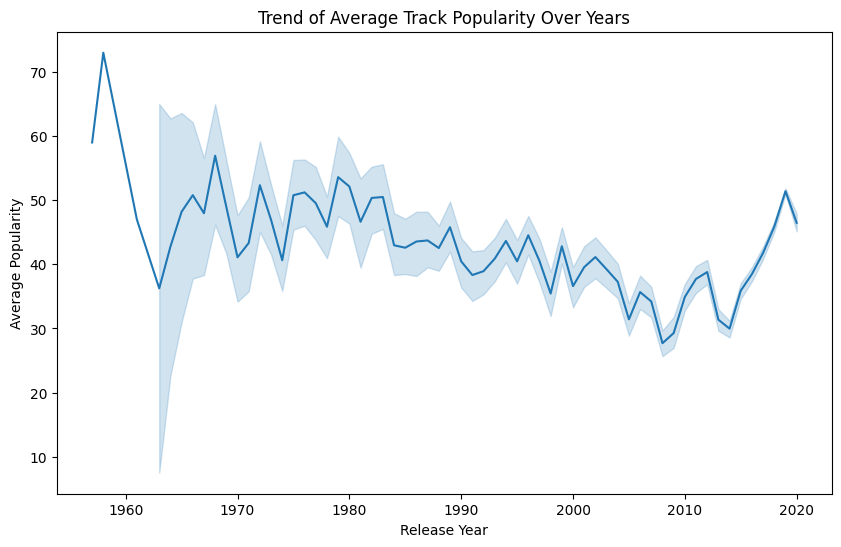

In [12]:
df_year = df.dropna(subset=['release_year'])
df_year = df_year[df_year['release_year'] > 1900]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='release_year', y='track_popularity', estimator='mean')
plt.title("Trend of Average Track Popularity Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()

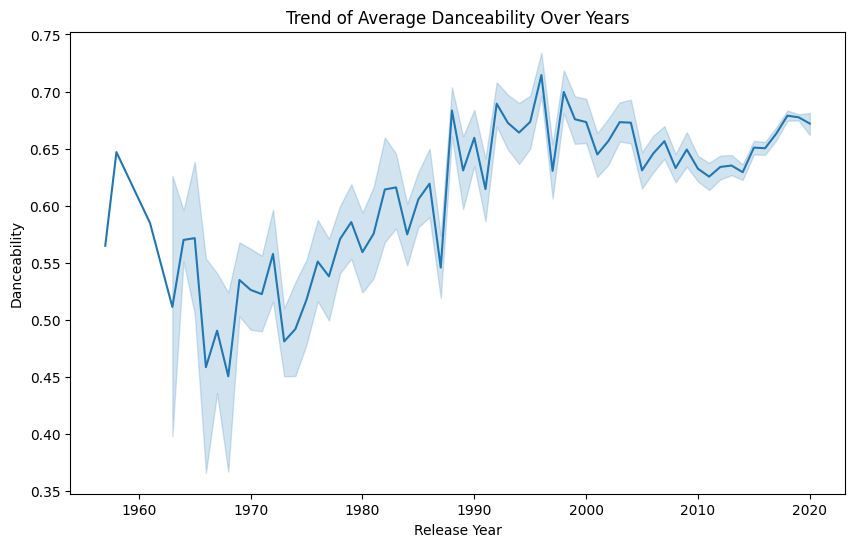

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='release_year', y='danceability', estimator='mean')
plt.title("Trend of Average Danceability Over Years")
plt.xlabel("Release Year")
plt.ylabel("Danceability")
plt.show()

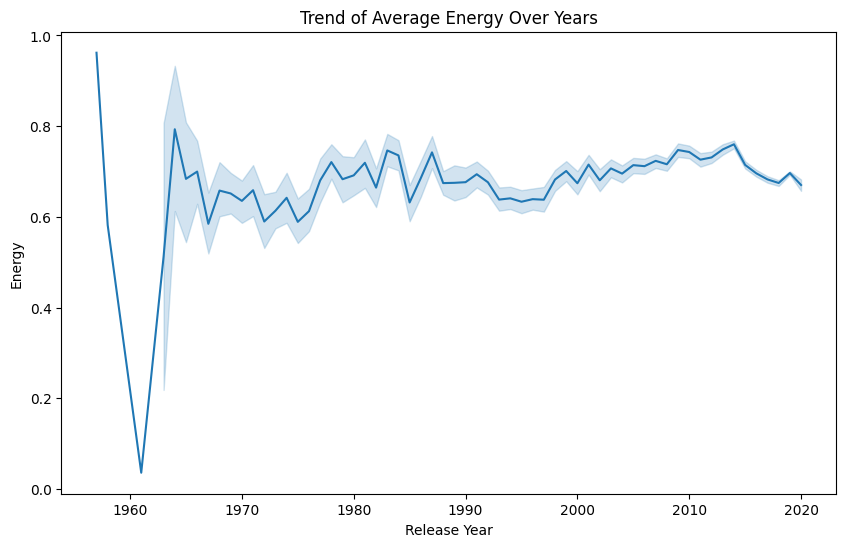

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='release_year', y='energy', estimator='mean')
plt.title("Trend of Average Energy Over Years")
plt.xlabel("Release Year")
plt.ylabel("Energy")
plt.show()

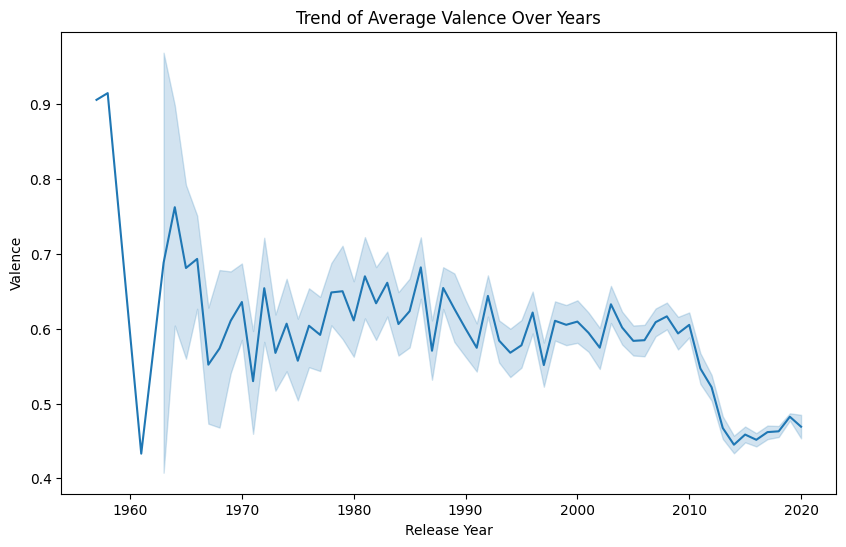

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='release_year', y='valence', estimator='mean')
plt.title("Trend of Average Valence Over Years")
plt.xlabel("Release Year")
plt.ylabel("Valence")
plt.show()

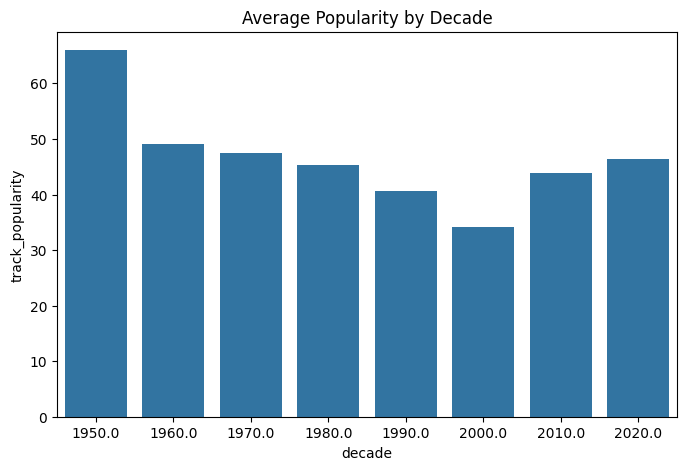

In [16]:
# Group by decade for instance
df_year['decade'] = (df_year['release_year'] // 10) * 10
decade_popularity = df_year.groupby('decade')['track_popularity'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=decade_popularity, x='decade', y='track_popularity')
plt.title("Average Popularity by Decade")
plt.show()

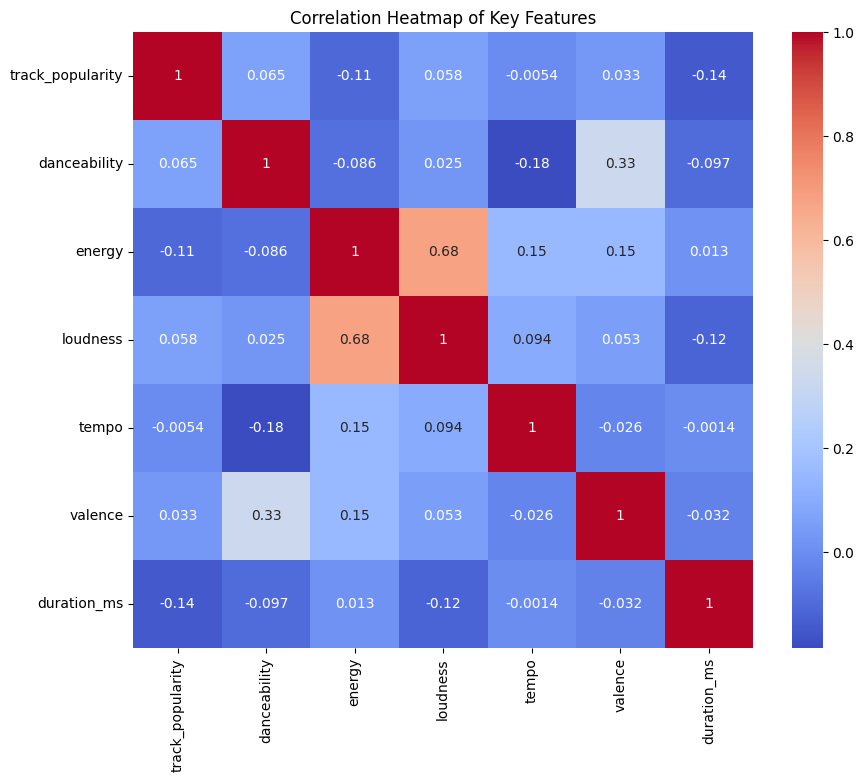

In [17]:
num_features = ['track_popularity','danceability','energy','loudness','tempo','valence','duration_ms']
corr = df[num_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Features")
plt.show()


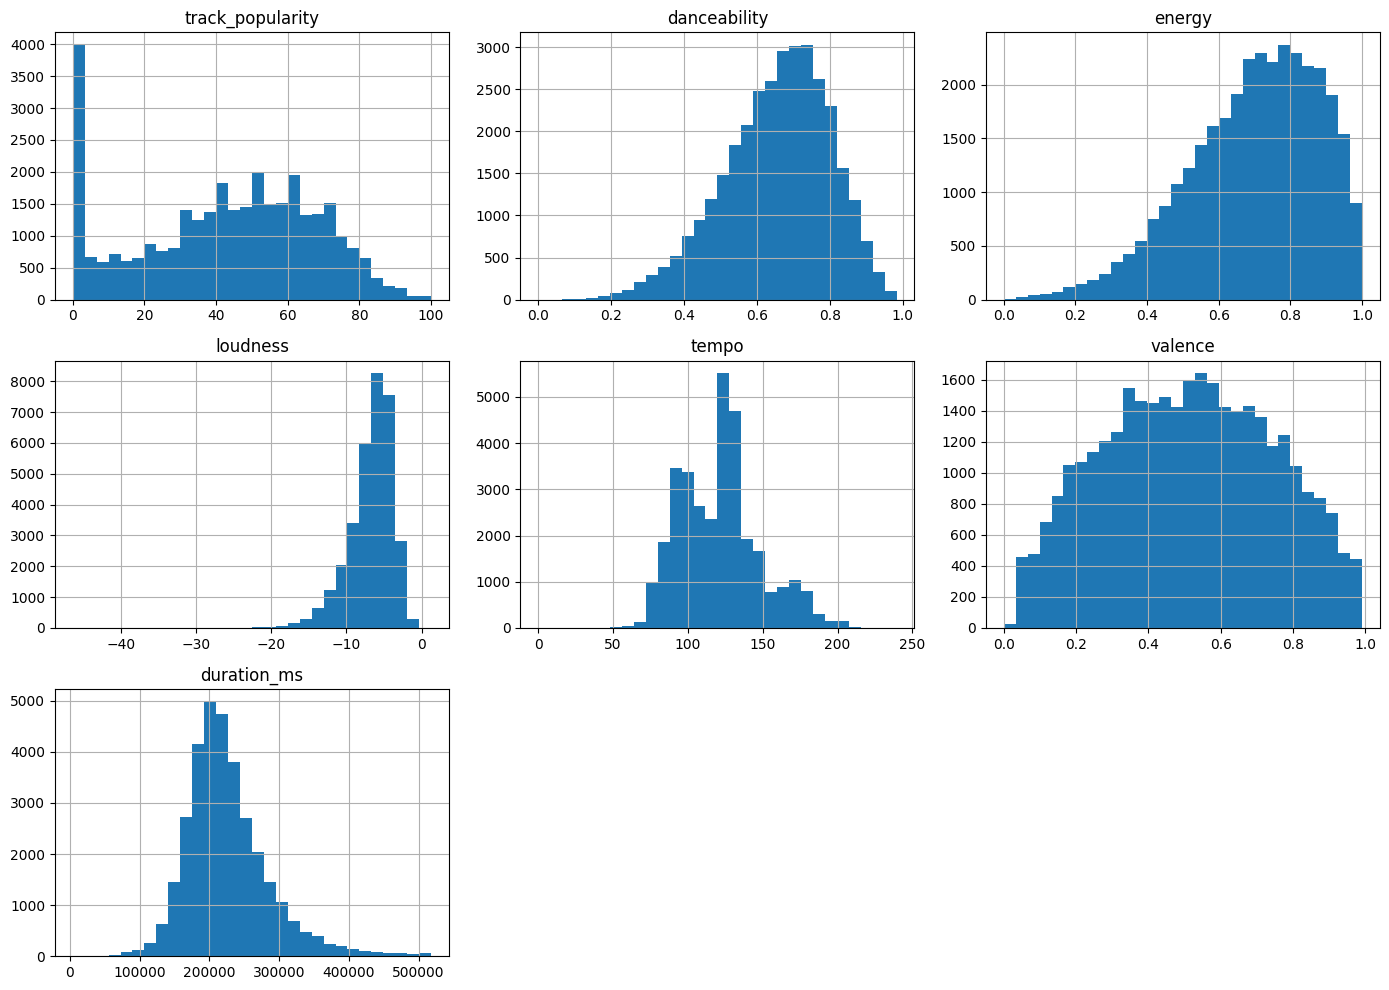

In [18]:
df[num_features].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()


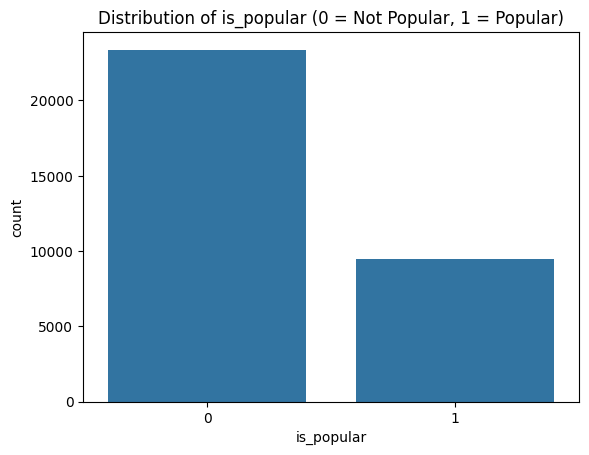

In [19]:
pop_threshold = 60
df['is_popular'] = (df['track_popularity'] >= pop_threshold).astype(int)

sns.countplot(x=df['is_popular'])
plt.title("Distribution of is_popular (0 = Not Popular, 1 = Popular)")
plt.show()


In [20]:
features = [
    'danceability','energy','loudness','speechiness','acousticness',
    'instrumentalness','liveness','valence','tempo','duration_ms'
]

df_model = df.dropna(subset=features + ['is_popular']).copy()
X = df_model[features]
y = df_model['is_popular']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (26266, 10)
Test set size: (6567, 10)


Classification Report:
              precision    recall  f1-score   support

 Not Popular       0.83      0.96      0.89      4676
     Popular       0.83      0.51      0.63      1891

    accuracy                           0.83      6567
   macro avg       0.83      0.74      0.76      6567
weighted avg       0.83      0.83      0.82      6567



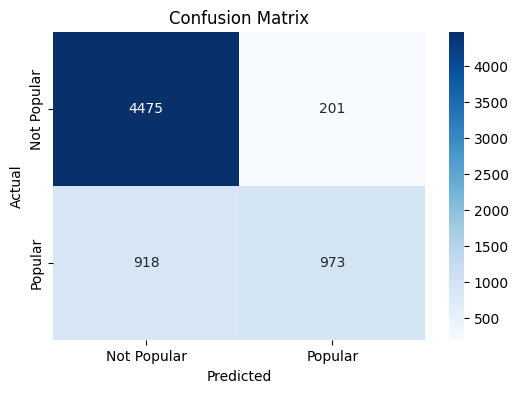

Accuracy: 0.8296025582457743


In [21]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Popular","Popular"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Popular","Popular"],
            yticklabels=["Not Popular","Popular"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))


In [22]:
shape_of_you = {
    'danceability': 0.825,
    'energy': 0.652,
    'loudness': -3.183,
    'speechiness': 0.0802,
    'acousticness': 0.581,
    'instrumentalness': 0.0,
    'liveness': 0.0931,
    'valence': 0.931,
    'tempo': 95.977,
    'duration_ms': 233713
}


new_song_df = pd.DataFrame([shape_of_you])
pred_prob = rf_model.predict_proba(new_song_df)[:,1][0]
pred_class = rf_model.predict(new_song_df)[0]

print(f"Predicted Probability of Being Popular: {pred_prob:.2f}")
print(f"Predicted Class (1 = Popular, 0 = Not Popular): {pred_class}")


Predicted Probability of Being Popular: 0.99
Predicted Class (1 = Popular, 0 = Not Popular): 1


In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

rec_features = ['danceability','energy','valence','tempo']
df_rec = df.dropna(subset=rec_features).reset_index(drop=True)

df_rec.drop_duplicates(subset=['track_name','track_artist'], inplace=True)

similarity_matrix = cosine_similarity(df_rec[rec_features])

In [24]:
def recommend_song(song_title, df, similarity_mat, top_n=5):
    # Find the first row matching the song_title
    matches = df[df['track_name'].str.contains(song_title, case=False, na=False)]
    if matches.empty:
        print("Song not found. Try another title.")
        return None

    idx = matches.index[0]
    sim_scores = list(enumerate(similarity_mat[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]

    return df.iloc[song_indices][['track_name','track_artist','track_popularity']]

recommended = recommend_song("Binibini", df_rec, similarity_matrix, top_n=5)
print(recommended)

                                              track_name     track_artist  \
26826                                           Threnody          Naeleck   
4024                    Don't Let Me Down (feat. Khalid)  Sabrina Claudio   
892                                      Unshakable Love  Elevation Youth   
29750  All Falls Down (feat. Juliander) - Mark Villa ...      Alan Walker   
535                                        Broken Arrows           Avicii   

       track_popularity  
26826                25  
4024                 60  
892                  37  
29750                44  
535                  10  


In [25]:
top_songs = (
    df.sort_values(by='track_popularity', ascending=False)
      .drop_duplicates(subset=['track_name','track_artist'])
)
print("Top 10 Most Popular Songs:")
print(top_songs[['track_name','track_artist','track_popularity']].head(10))


Top 10 Most Popular Songs:
                track_name    track_artist  track_popularity
20091         Dance Monkey     Tones and I               100
30202              ROXANNE  Arizona Zervas                99
30209              Circles     Post Malone                98
19715      Blinding Lights      The Weeknd                98
20252                 Tusa         KAROL G                98
19707              The Box     Roddy Ricch                98
19265             Memories        Maroon 5                98
19719      Don't Start Now        Dua Lipa                97
22940  everything i wanted   Billie Eilish                97
30206              Falling   Trevor Daniel                97


In [26]:
album_pop = df.groupby('track_album_name')['track_popularity'].mean().reset_index()
album_pop = album_pop.sort_values(by='track_popularity', ascending=False)
print("Top 10 Albums by Average Popularity:")
print(album_pop.head(10))

Top 10 Albums by Average Popularity:
                                  track_album_name  track_popularity
3903   Dance Monkey (Stripped Back) / Dance Monkey        100.000000
17644                                         Tusa         98.000000
19419                          everything i wanted         97.000000
4536                               Don't Start Now         97.000000
19285                                        Yummy         95.000000
2204                               Blinding Lights         94.333333
6770                           HIGHEST IN THE ROOM         94.000000
13570                                      Ride It         94.000000
19453                              hot girl bummer         94.000000
3171                                         China         93.000000


In [27]:
artist_pop = df.groupby('track_artist')['track_popularity'].mean().reset_index()
artist_pop = artist_pop.sort_values(by='track_popularity', ascending=False)
print("Top 10 Artists by Average Popularity:")
print(artist_pop.head(10))

Top 10 Artists by Average Popularity:
        track_artist  track_popularity
9735   Trevor Daniel         97.000000
10242            Y2K         91.000000
2601     Don Toliver         90.714286
7959     Roddy Ricch         88.210526
2209          DaBaby         87.857143
5040            Kina         85.400000
4196        JACKBOYS         85.166667
10256      YNW Melly         84.600000
9031           Tainy         84.000000
2216    Dadá Boladão         84.000000


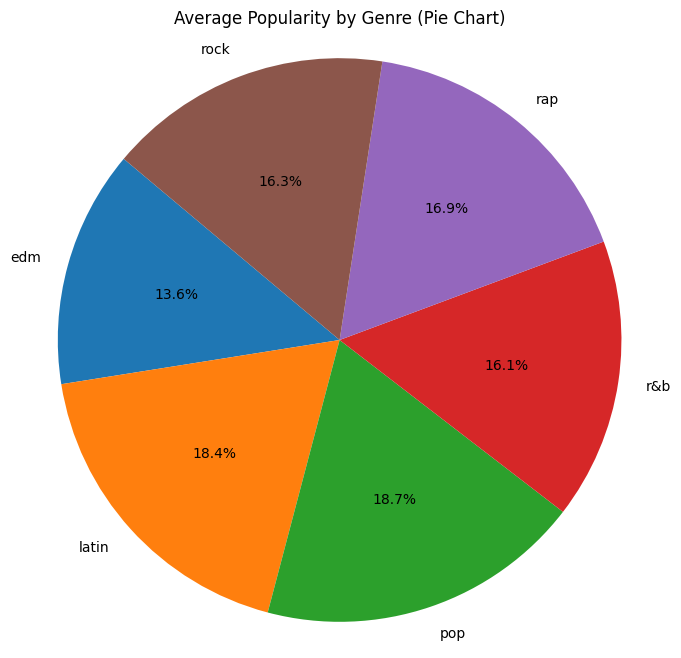

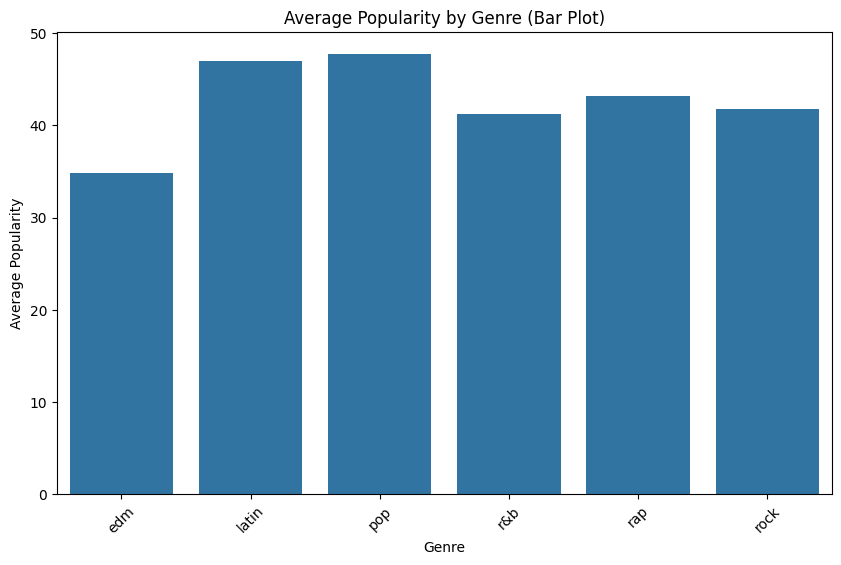

In [28]:
# Aggregate average popularity by playlist_genre
genre_pop = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Pie chart for average popularity across genres
plt.figure(figsize=(8,8))
plt.pie(
    genre_pop['track_popularity'],
    labels=genre_pop['playlist_genre'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Average Popularity by Genre (Pie Chart)")
plt.axis('equal')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=genre_pop, x='playlist_genre', y='track_popularity')
plt.title("Average Popularity by Genre (Bar Plot)")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

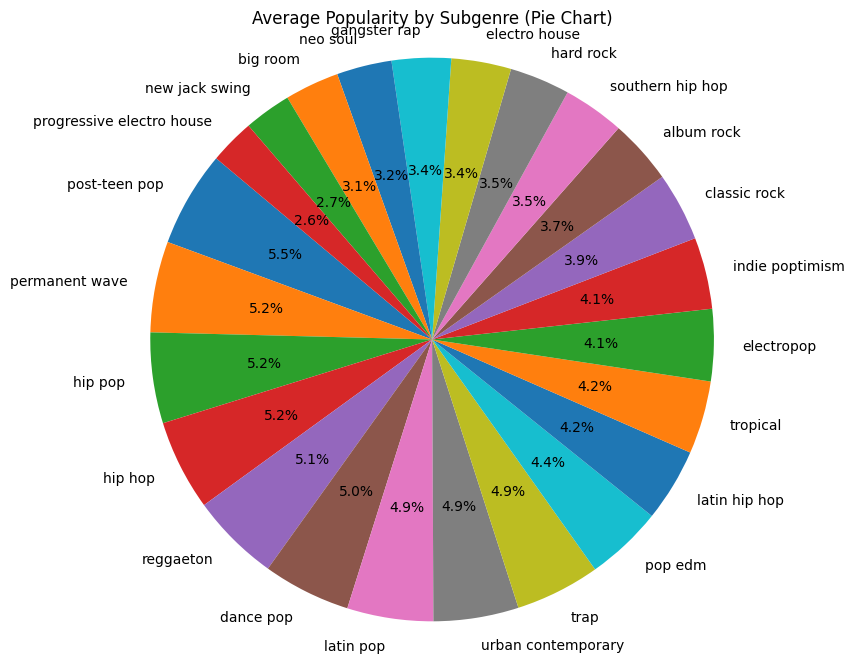

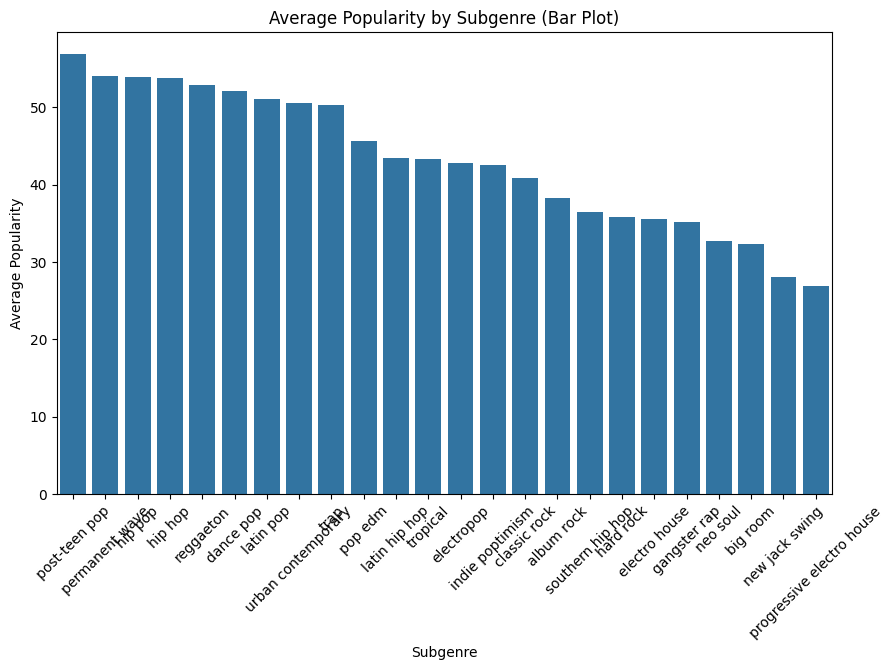

In [29]:
# Group by subgenre
subgenre_pop = df.groupby('playlist_subgenre')['track_popularity'].mean().reset_index()
subgenre_pop = subgenre_pop.sort_values(by='track_popularity', ascending=False)

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(
    subgenre_pop['track_popularity'],
    labels=subgenre_pop['playlist_subgenre'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Average Popularity by Subgenre (Pie Chart)")
plt.axis('equal')
plt.show()

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(data=subgenre_pop, x='playlist_subgenre', y='track_popularity')
plt.title("Average Popularity by Subgenre (Bar Plot)")
plt.xlabel("Subgenre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

Confusion Matrix:
[[4549  265]
 [ 428 1325]]


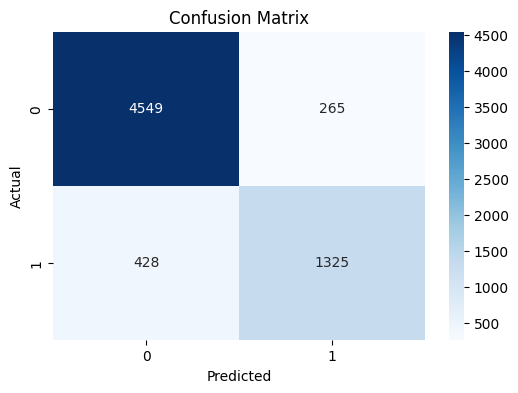

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4814
           1       0.83      0.76      0.79      1753

    accuracy                           0.89      6567
   macro avg       0.87      0.85      0.86      6567
weighted avg       0.89      0.89      0.89      6567



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a binary target variable based on a threshold (e.g., popularity > 70)
df['track_popularity_class'] = (df['track_popularity'] > 60).astype(int)

# 2. Create the 'artist_popularity' column using transform
# This calculates the average track popularity for each artist and assigns it to each row
df['artist_popularity'] = df.groupby('track_artist')['track_popularity'].transform('mean')

# 3. Define the features for the model, including the new artist_popularity feature
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'artist_popularity'
]

X = df[features]
y = df['track_popularity_class']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Predict on the test set
y_pred = clf.predict(X_test)

# 7. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 8. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 9. Optionally, print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mean Squared Error: 245.8250072804194
R^2 Score: 0.6041022659466446


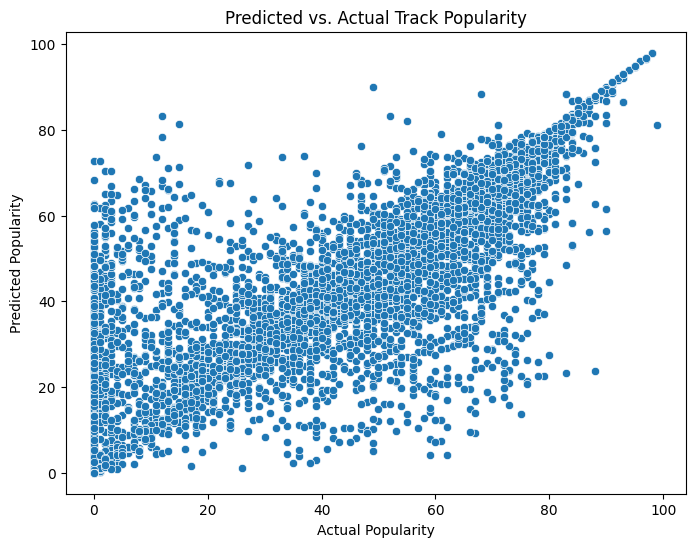

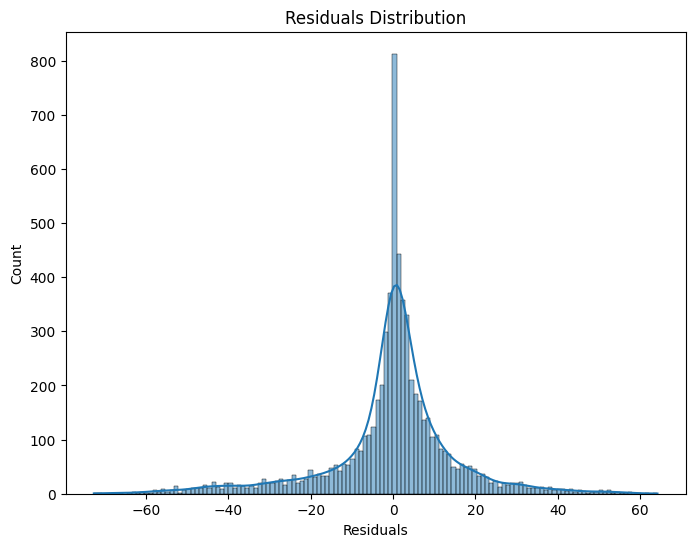

Custom Regression Accuracy (within 15 popularity points): 77.83%


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Create the 'artist_popularity' column using transform.
# This calculates the average track popularity for each artist and assigns it to each row.
df['artist_popularity'] = df.groupby('track_artist')['track_popularity'].transform('mean')

# 2. Define the features for the model, including the new artist_popularity feature.
# Use track_popularity as the continuous target variable.
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'artist_popularity'
]

X = df[features]
y = df['track_popularity']  # Continuous target variable

# 3. Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Random Forest Regressor.
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# 5. Predict on the test set.
y_pred = reg.predict(X_test)

# 6. Evaluate the model using Mean Squared Error (MSE) and R^2 score.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 7. Visualize predicted vs. actual popularity.
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs. Actual Track Popularity")
plt.show()

# 8. Plot residuals to check model performance.
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

tolerance = 15
accurate_predictions = abs(y_pred - y_test) < tolerance
custom_accuracy = accurate_predictions.mean()
print("Custom Regression Accuracy (within {} popularity points): {:.2f}%".format(tolerance, custom_accuracy * 100))


In [32]:
# Example: A new artist who doesn't exist in the dataset
artist_name = "SingerFirstSong"  # Not in df['track_artist']

# Attempt to get this artist's average popularity
artist_pop_val = df.loc[df['track_artist'] == artist_name, 'artist_popularity'].mean()

# If artist not found, fallback to dataset-wide mean
if pd.isnull(artist_pop_val):
    artist_pop_val = df['artist_popularity'].mean()

new_song_first_artist = {
    'danceability': 0.75,
    'energy': 0.80,
    'key': 5,
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.03,
    'acousticness': 0.15,
    'instrumentalness': 0.0,
    'liveness': 0.10,
    'valence': 0.70,
    'tempo': 120.0,
    'duration_ms': 230000,
    'artist_popularity': artist_pop_val
}

import pandas as pd
test_df = pd.DataFrame([new_song_first_artist])
predicted_pop = reg.predict(test_df)[0]
print("Predicted popularity for new artist's first song:", predicted_pop)

Predicted popularity for new artist's first song: 46.445


In [33]:
artist_name = "Ed Sheeran"
artist_pop_val = df.loc[df['track_artist'] == artist_name, 'artist_popularity'].mean()

# If the artist isn't in the dataset, we fallback to a default (mean) artist popularity.
if pd.isnull(artist_pop_val):
    artist_pop_val = df['artist_popularity'].mean()

# Define the new song's features, including the artist_popularity we just found.
new_song = {
    'danceability': 0.80,
    'energy': 0.75,
    'key': 5,
    'loudness': -5.2,
    'mode': 1,
    'speechiness': 0.04,
    'acousticness': 0.12,
    'instrumentalness': 0.0,
    'liveness': 0.20,
    'valence': 0.68,
    'tempo': 124.0,
    'duration_ms': 210000,
    'artist_popularity': artist_pop_val
}

# Convert the dictionary to a DataFrame
import pandas as pd
new_song_df = pd.DataFrame([new_song])

# Use the existing regressor (reg) to predict the popularity
predicted_popularity = reg.predict(new_song_df)[0]
print("Predicted Popularity for the new track:", predicted_popularity)

Predicted Popularity for the new track: 72.76090476190477


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------- Step 1: Load and Prepare Dataset --------------------
df = pd.read_csv("/users/chiragjogi/PES/SEM-6/Epoch_2.0/spotify_songs/spotify_songs.csv")
df['artist_popularity'] = df.groupby('track_artist')['track_popularity'].transform('mean')
# Define the features used for prediction (ensure these columns exist in your CSV)
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'artist_popularity'
]
target = 'track_popularity'

# We also need the song name and track_id for later reference.
# Drop rows with missing values in any of these columns.
df_model = df[['track_id', 'track_name'] + features + [target]].dropna()

# -------------------- Step 2: Train a Regression Model --------------------
# Split the data into training and testing sets
X = df_model[features]
y = df_model[target]
song_ids = df_model['track_id']
track_names = df_model['track_name']

X_train, X_test, y_train, y_test, train_ids, test_ids, train_names, test_names = train_test_split(
    X, y, song_ids, track_names, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance on the test set (optional)
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("Test Set Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)
print("Pseudo Accuracy (R^2 * 100): {:.2f}%".format(r2 * 100))

# -------------------- Step 3: User Input and Prediction --------------------
# Prompt the user to enter a song name
song_name_input = input("\nEnter a song name: ")

# Search the full dataset for a matching song (case-insensitive)
song_match = df_model[df_model['track_name'].str.contains(song_name_input, case=False, na=False)]

if song_match.empty:
    print("No matching song found in the dataset.")
else:
    # If multiple matches, select the first one.
    song_row = song_match.iloc[0]

    # Extract features for this song
    song_feature_values = song_row[features].to_frame().T

    # Predict the song popularity using the trained model
    predicted_popularity = model.predict(song_feature_values)[0]

    # Get the actual popularity from the dataset
    actual_popularity = song_row[target]

    print("\nSong Found: {}".format(song_row['track_name']))
    print("Predicted Popularity: {:.2f}".format(predicted_popularity))
    print("Actual Popularity: {}".format(actual_popularity))

    # Calculate error metrics
    absolute_error = abs(predicted_popularity - actual_popularity)
    percent_error = (absolute_error / actual_popularity * 100) if actual_popularity != 0 else float('inf')

    print("Absolute Error: {:.2f}".format(absolute_error))
    print("Percent Error: {:.2f}%".format(percent_error))

Test Set Evaluation:
Mean Squared Error (MSE): 250.95535095083065
R-squared Score: 0.5912070815705546
Pseudo Accuracy (R^2 * 100): 59.12%

Song Found: Shape of You
Predicted Popularity: 82.87
Actual Popularity: 86
Absolute Error: 3.13
Percent Error: 3.64%


Test Set Evaluation:
Mean Squared Error: 250.61717854806238
R^2 Score: 0.5917579464273355


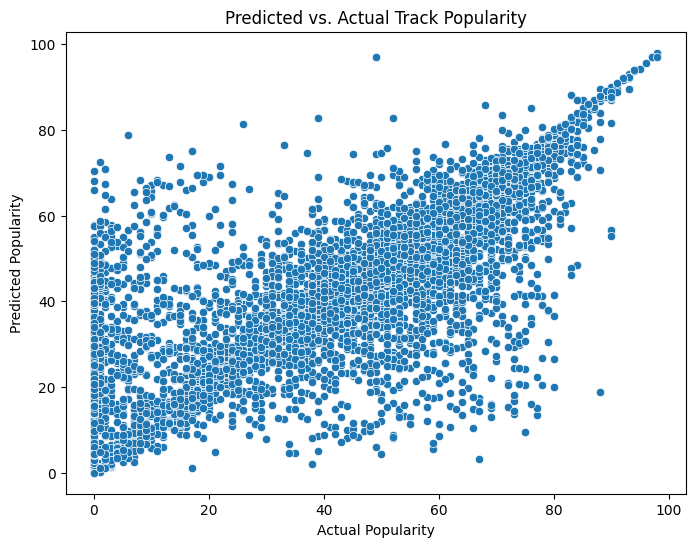

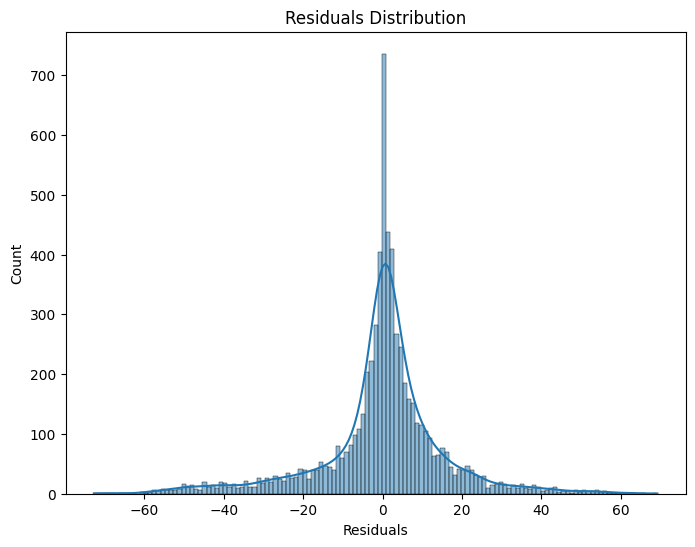

Custom Regression Accuracy (within 15 popularity points): 77.06%

Song Found: Shape of You
Predicted Popularity: 82.87
Actual Popularity: 86
Absolute Error: 3.13
Percent Error: 3.64%

Suggestions to potentially increase popularity:
danceability: Consider decreasing danceability (current: 0.82, average among popular songs: 0.66).
energy: Consider increasing energy (current: 0.65, average among popular songs: 0.68).
key: Consider increasing key (current: 1.00, average among popular songs: 5.39).
loudness: Consider decreasing loudness (current: -3.18, average among popular songs: -6.59).
mode: Consider increasing mode (current: 0.00, average among popular songs: 0.57).
speechiness: Consider increasing speechiness (current: 0.08, average among popular songs: 0.11).
acousticness: Consider decreasing acousticness (current: 0.58, average among popular songs: 0.19).
instrumentalness: Consider increasing instrumentalness (current: 0.00, average among popular songs: 0.06).
liveness: Consider inc

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- Step 1: Load and Prepare Dataset --------------------
df = pd.read_csv("/users/chiragjogi/PES/SEM-6/Epoch_2.0/spotify_songs/spotify_songs.csv")

# Create the 'artist_popularity' column as the average track popularity per artist.
df['artist_popularity'] = df.groupby('track_artist')['track_popularity'].transform('mean')

# Define features, including additional ones (key and mode) for better prediction accuracy.
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'artist_popularity'
]
target = 'track_popularity'

# Select required columns including song id and name; drop any rows with missing values.
df_model = df[['track_id', 'track_name'] + features + [target]].dropna()

# -------------------- Step 2: Train a Regression Model --------------------
X = df_model[features]
y = df_model[target]

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor.
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Evaluate model performance on the test set.
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test Set Evaluation:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize predicted vs. actual popularity.
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs. Actual Track Popularity")
plt.show()

# Plot residuals distribution.
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Calculate custom regression accuracy: percentage of predictions within a tolerance level.
tolerance = 15
accurate_predictions = abs(y_pred - y_test) < tolerance
custom_accuracy = accurate_predictions.mean()
print("Custom Regression Accuracy (within {} popularity points): {:.2f}%".format(tolerance, custom_accuracy * 100))

# -------------------- Step 3: User Input, Prediction, and Feature Recommendations --------------------
# Prompt the user to enter a song name.
song_name_input = input("\nEnter a song name: ")

# Search the full dataset for a matching song (case-insensitive).
song_match = df_model[df_model['track_name'].str.contains(song_name_input, case=False, na=False)]

if song_match.empty:
    print("No matching song found in the dataset.")
else:
    # If multiple matches, select the first one.
    song_row = song_match.iloc[0]

    # Extract features for this song, converting the row into a DataFrame to preserve column names.
    song_feature_values = song_row[features].to_frame().T

    # Predict the song popularity using the trained model.
    predicted_popularity = reg.predict(song_feature_values)[0]

    # Get the actual popularity from the dataset.
    actual_popularity = song_row[target]

    print("\nSong Found: {}".format(song_row['track_name']))
    print("Predicted Popularity: {:.2f}".format(predicted_popularity))
    print("Actual Popularity: {}".format(actual_popularity))

    # Calculate error metrics for this song.
    absolute_error = abs(predicted_popularity - actual_popularity)
    percent_error = (absolute_error / actual_popularity * 100) if actual_popularity != 0 else float('inf')

    print("Absolute Error: {:.2f}".format(absolute_error))
    print("Percent Error: {:.2f}%".format(percent_error))

    # -------------------- Provide Feature Recommendations --------------------
    # Define "popular" songs as those with track_popularity >= median popularity.
    popularity_median = df_model[target].median()
    popular_songs = df_model[df_model[target] >= popularity_median]
    avg_values_popular = popular_songs[features].mean()

    recommendations = {}
    for feature in features:
        # Skip recommendation for 'artist_popularity'
        if feature == 'artist_popularity':
            continue
        current_val = song_row[feature]
        avg_val = avg_values_popular[feature]
        if current_val < avg_val:
            recommendations[feature] = f"Consider increasing {feature} (current: {current_val:.2f}, average among popular songs: {avg_val:.2f})."
        elif current_val > avg_val:
            recommendations[feature] = f"Consider decreasing {feature} (current: {current_val:.2f}, average among popular songs: {avg_val:.2f})."
        else:
            recommendations[feature] = f"{feature} is already optimal (value: {current_val:.2f})."

    print("\nSuggestions to potentially increase popularity:")
    for feat, rec in recommendations.items():
        print(f"{feat}: {rec}")